# Bypass real capcaitor calculator

For a detailed explanation, please watch our dear australian friend [Dave](https://www.youtube.com/watch?v=BcJ6UdDx1vg&t=1529s)

Basically we are using the real capcaitor equivalent:

![](https://www.digikey.es/~/media/Images/Article%20Library/TechZone%20Articles/2011/January/Smart%20Extreme%20Low-Power%20Design/TZM111_Smart_Extreme_Fig_1.jpg)

For practical purposes Cda = Rda = Rl = 0. So the equivalent circuit is a series RCL circuit

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

## Implementation for 1 capacitor

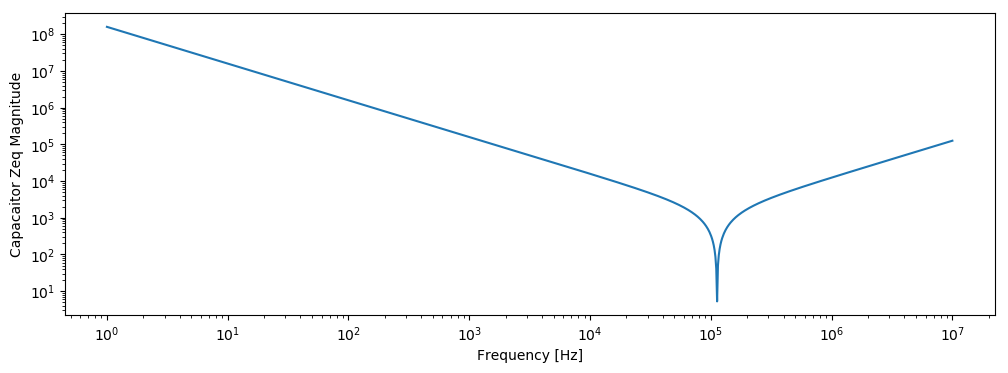

In [33]:
C = 1e-9 # Capacitance (1nF)
ESR = 2 # Equivalent Series resistor (2ohm)
ESL = 2e-3 # Equivalent Series inductance (2mH)

RLCap = [C,ESR,ESL]

f = np.logspace(0, 7, num=1000)
w = 2*np.pi*f
Zeq = RLCap[1] + (1/(1j*w*RLCap[0])) + (1j*w*RLCap[2])

# extract modulus
ZeqMag = [abs(ele) for ele in Zeq]


# Helper to adapt images to full width
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
  
# plot the complex numbers
plt.loglog(f, ZeqMag)
plt.ylabel('Capacaitor Zeq Magnitude')
plt.xlabel('Frequency [Hz]')
plt.show()

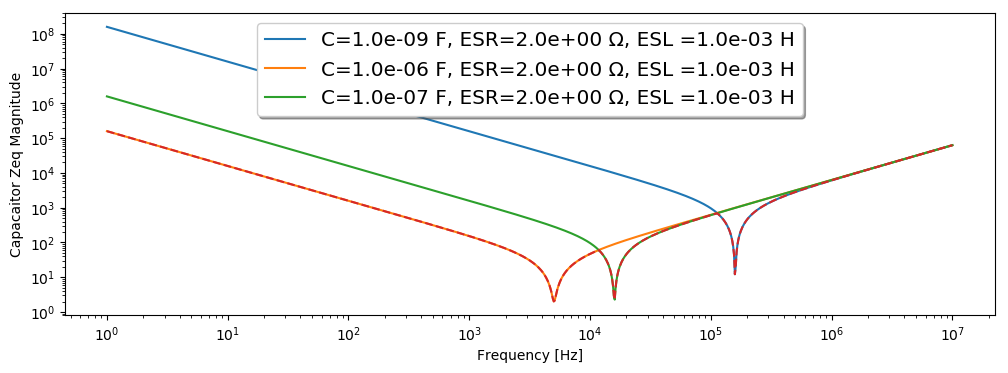

In [64]:
RLCapArr = [[1e-9,2,1e-3],
            [1e-6,2,1e-3],
            [0.1e-6,2,1e-3],
           ] # Formart [C,ESR,ESL]

ResultsArr = []
fig, ax = plt.subplots()
for RLCap in RLCapArr:

    f = np.logspace(0, 7, num=1000)
    w = 2*np.pi*f
    Zeq = RLCap[1] + (1/(1j*w*RLCap[0])) + (1j*w*RLCap[2])

    # extract modulus
    ZeqMag = [abs(ele) for ele in Zeq]
    ResultsArr.append(ZeqMag)


    # Helper to adapt images to full width


    # plot the complex numbers
    ax.loglog(f, ZeqMag, label="C=%.1e F, ESR=%.1e \u03A9, ESL =%.1e H"%(RLCap[0],RLCap[1],RLCap[2]))

minArr = np.minimum(ResultsArr[0],ResultsArr[1])
minArr = np.minimum(minArr,ResultsArr[2])
plt.loglog(f, minArr,"--")


legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.ylabel('Capacaitor Zeq Magnitude')
plt.xlabel('Frequency [Hz]')

plt.show()